<a href="https://colab.research.google.com/github/Jang-jw/DeepLearning/blob/main/ex10_yolov8_rsp_detection_%EA%B0%95%EC%82%AC%EB%8B%98%EC%BD%94%EB%93%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# gpu
# 드라이브 연동
# 경로 yolo_study 까지 이동

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/DeepLearning/YOLO_STUDY

/content/drive/MyDrive/Colab Notebooks/DeepLearning/YOLO_STUDY


In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.5/644.5 kB 6.7 MB/s eta 0:00:00


In [ ]:
!pip install roboflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.0/69.0 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.3 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.1.78
    Uninstalling opencv-python-headless-4.8.1.78:
      Successfully uninstall

In [ ]:
# 가위바위보 데이터 다운로드
from roboflow import Roboflow
rf = Roboflow(api_key="LFl9gm9dS9xBAY6MSV2f")
project = rf.workspace("project-kzetv").project("yolov7_rock_paper_scissors")
dataset = project.version(1).download("yolov8")


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.134 is required but found version=8.0.199, to fix: `pip install ultralytics==8.0.134`



Extracting Dataset Version Zip to yolov7_rock_paper_scissors-1 in yolov8:: 100%|██████████| 1212/1212 [04:52<00:00,  4.15it/s]


In [ ]:
# 학습
# 모델 선택
from ultralytics import YOLO
# model 변수에 yolov8 모델 선택해서 담아주기
model = YOLO('yolov8n.yaml')


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

In [ ]:
%pwd

'/content/drive/MyDrive/Colab Notebooks/DeepLearning/YOLO_STUDY'

In [ ]:
# 학습
# train
# 가위바위보 데이터셋 data.yaml 경로를 '절대경로' 설정이 필요
results = model.train(data = '/content/drive/MyDrive/Colab Notebooks/DeepLearning/YOLO_STUDY/yolov7_rock_paper_scissors-1/data.yaml', epochs = 150, imgsz= 640)
results

Ultralytics YOLOv8.0.199 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/content/drive/MyDrive/Colab Notebooks/DeepLearning/YOLO_STUDY/yolov7_rock_paper_scissors-1/data.yaml, epochs=150, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train13, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, cla

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e1813cfac50>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

In [ ]:
results

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e1813cfac50>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

In [ ]:
# 모델 예측하기
model_path = '/content/drive/MyDrive/Colab Notebooks/DeepLearning/YOLO_STUDY/runs/detect/train/weights/best.pt'

from ultralytics import YOLO

# Load a pretrained YOLOv8n model
model = YOLO(model_path)

# Define path to the image file 이미지 경로
source = '/content/drive/MyDrive/Colab Notebooks/DeepLearning/YOLO_STUDY/yolov7_rock_paper_scissors-1/test/images/IMG_7077_MOV-106_jpg.rf.72a361d95022a14807cd637786bb9b2f.jpg'

# Run inference on the source
results = model(source, save = True, conf = 0.45)  # list of Results objects


image 1/1 /content/drive/MyDrive/Colab Notebooks/DeepLearning/YOLO_STUDY/yolov7_rock_paper_scissors-1/test/images/IMG_7077_MOV-106_jpg.rf.72a361d95022a14807cd637786bb9b2f.jpg: 640x640 1 Rock, 1 Scissors, 8.9ms
Speed: 1.7ms preprocess, 8.9ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


In [ ]:
type(results[0])
results[0].plot().dtype

dtype('uint8')

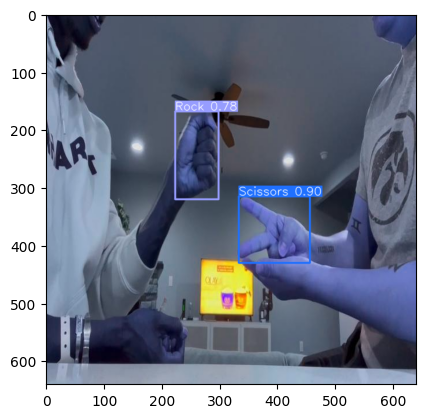

In [ ]:
# colab내부에서 예측 결과 출력해보기
import matplotlib.pyplot as plt
plt.imshow(results[0].plot())
# python 색상체계 rgb
# results 배열값 bgr

In [ ]:
# 이미지 여러장 예측시키기
import glob
# 해당 폴더 안에 있는 모든 이미지 파일명 접근하기
img_list = glob.glob('./yolov7_rock_paper_scissors-1/test/images/*.jpg')
img_list

['./yolov7_rock_paper_scissors-1/test/images/15208484cellblock_jpg.rf.999933c2657b86d4431d933349d8959f.jpg',
 './yolov7_rock_paper_scissors-1/test/images/10e0gvm_jpg.rf.6fb849d8fc05c0c29f18f36d0ba3badc.jpg',
 './yolov7_rock_paper_scissors-1/test/images/Cool-Video-of-Ocean-Fish-Swimming_mp4-16_jpg.rf.79aeaef6f4fc452cc81fbbfed5783d1e.jpg',
 './yolov7_rock_paper_scissors-1/test/images/610x_jpg.rf.7d0d418243aee8be6a15f0c7b73c8085.jpg',
 './yolov7_rock_paper_scissors-1/test/images/20061004021831_jpg.rf.c03b7be76f235d87ef2ab9b53e31f2d4.jpg',
 './yolov7_rock_paper_scissors-1/test/images/ComfortSuites_MEETINGM_jpg.rf.7ca81d8669c468681d507b731d27fde1.jpg',
 './yolov7_rock_paper_scissors-1/test/images/19171_298_298_1_0_jpg.rf.3e6c059919986075ff99022710217221.jpg',
 './yolov7_rock_paper_scissors-1/test/images/Cool-Video-of-Ocean-Fish-Swimming_mp4-4_jpg.rf.c16527143ae9688d89f417f092f1b9f7.jpg',
 './yolov7_rock_paper_scissors-1/test/images/Cool-Video-of-Ocean-Fish-Swimming_mp4-18_jpg.rf.f402ebecf32

In [ ]:
# best.pt -> model
sources = img_list  # 여러장의 이미지
# 예측시키기
results = model(sources, save = True, conf= 0.45)
results


0: 640x640 3 Rocks, 1: 640x640 1 Scissors, 2: 640x640 (no detections), 3: 640x640 (no detections), 4: 640x640 (no detections), 5: 640x640 1 Scissors, 6: 640x640 1 Rock, 7: 640x640 (no detections), 8: 640x640 (no detections), 9: 640x640 (no detections), 10: 640x640 (no detections), 11: 640x640 (no detections), 12: 640x640 1 Scissors, 13: 640x640 (no detections), 14: 640x640 (no detections), 15: 640x640 1 Scissors, 16: 640x640 (no detections), 17: 640x640 (no detections), 18: 640x640 (no detections), 19: 640x640 (no detections), 20: 640x640 (no detections), 21: 640x640 (no detections), 22: 640x640 (no detections), 23: 640x640 (no detections), 24: 640x640 (no detections), 25: 640x640 (no detections), 26: 640x640 (no detections), 27: 640x640 (no detections), 28: 640x640 (no detections), 29: 640x640 (no detections), 30: 640x640 (no detections), 31: 640x640 1 Paper, 32: 640x640 (no detections), 33: 640x640 1 Paper, 34: 640x640 (no detections), 35: 640x640 1 Scissors, 36: 640x640 1 Scissors,

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'Paper', 1: 'Rock', 2: 'Scissors'}
 orig_img: array([[[216, 215, 217],
         [216, 215, 217],
         [218, 217, 219],
         ...,
         [195, 179, 173],
         [194, 178, 172],
         [193, 177, 171]],
 
        [[216, 215, 217],
         [217, 216, 218],
         [218, 217, 219],
         ...,
         [195, 179, 173],
         [194, 178, 172],
         [193, 177, 171]],
 
        [[216, 215, 217],
         [217, 216, 218],
         [218, 217, 219],
         ...,
         [195, 179, 173],
         [194, 178, 172],
         [193, 177, 171]],
 
        ...,
 
        [[ 62,  75,  77],
         [ 62,  75,  77],
         [ 61,  74,  76],
         ...,
         [  9,   8,  17],
         [ 13,  12,  21],
         [ 14,  13,  22]],
 
        [[ 63,  78,  81],
         [ 62,  77,  80],
         [ 62,  77,  80],
         ...,
    

In [ ]:
# 동영상 예측
# colab 이미지 다루기 편리한 환경은 x
